
# Project: No-show Appointments for a Medical Hospital in Brazil

### Why do 30% of patients miss their scheduled appointments?

>The purpose of this analysis is to highlight the reasons for patients not showing up to their scheduled appointments.
In this analysis, attempts are made to have a clear insight on the factors that are important for us to know in order to predict if a patient will show up for their scheduled appointment.

>Variables to be explored in this analysis: 
Gender, Age, Neigbourhood, and whether or not sending an SMS to patients beforhand would aid on attending scheduled appointments more often.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    
</ul>

<a id='intro'></a>
## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame? This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

##### Importing Packages:

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Reading Csv File:

In [183]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

##### Displaying the DataFrame:

In [184]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Displaying the DataFrame Dimension:

In [185]:
print('The DataFrame consists of {} Columns, and {} Rows.'.format(df.shape[1], df.shape[0]))

The DataFrame consists of 14 Columns, and 110527 Rows.


##### Excluding unnecessary data:

In [186]:
df.drop(['AppointmentID'], axis = 1, inplace = True)

##### Displaying the DataFrame:

In [187]:
df.sample(10)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
67534,7.823674e+10,F,2016-05-09T08:03:52Z,2016-05-09T00:00:00Z,4,SANTA MARTHA,0,0,0,0,0,0,No
1338,7.184137e+13,F,2016-03-16T13:06:45Z,2016-04-29T00:00:00Z,44,CARATOÍRA,0,0,0,0,0,1,No
28401,9.229387e+13,F,2016-05-06T09:32:16Z,2016-05-06T00:00:00Z,73,DA PENHA,0,1,0,0,1,0,No
66151,1.516640e+14,M,2016-05-30T17:59:08Z,2016-05-31T00:00:00Z,43,JARDIM CAMBURI,0,0,0,0,0,0,Yes
75945,8.312861e+13,F,2016-05-18T15:20:35Z,2016-05-18T00:00:00Z,60,SÃO PEDRO,0,1,0,0,0,0,No
86558,4.771767e+14,F,2016-06-03T13:18:13Z,2016-06-03T00:00:00Z,26,MARIA ORTIZ,0,0,0,0,0,0,No
94314,9.412263e+12,F,2016-06-02T09:19:08Z,2016-06-02T00:00:00Z,43,ILHA DO PRÍNCIPE,1,1,0,0,0,0,No
108703,2.745236e+13,M,2016-06-06T15:04:10Z,2016-06-06T00:00:00Z,67,ESTRELINHA,0,1,0,1,0,0,No
64067,9.555374e+13,F,2016-05-05T09:33:38Z,2016-05-10T00:00:00Z,22,ANDORINHAS,0,0,0,0,0,1,No
38383,2.279943e+10,M,2016-05-02T13:30:23Z,2016-05-04T00:00:00Z,39,PRAIA DO SUÁ,0,0,0,0,0,0,No


##### Quick info about the DataFrame:

In [188]:
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Outliners: Age(-1), Handcap-max(4)

<a id='cleaning'></a>
## Data Cleaning

>The following operations to be carried out:
>1. Remove the row with age value that is less than zero from the Dataset.
2. Changing the value of Handcap that is more than one to one for Boolean Indexing.


##### Removing outliners:

In [189]:
df[df["Age"] < 0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [190]:
df.drop(axis = 0, index = 99832, inplace = True)

In [191]:
df[df["Handcap"] > 1].count()

PatientId         199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

##### Fixing boolean numbers:

In [192]:
df.replace({'Handcap': {4: 1, 3: 1, 2: 1}}, inplace = True)

In [193]:
df[df["Handcap"] > 1].count()

PatientId         0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### Checking for null cells:

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   Gender          110526 non-null  object 
 2   ScheduledDay    110526 non-null  object 
 3   AppointmentDay  110526 non-null  object 
 4   Age             110526 non-null  int64  
 5   Neighbourhood   110526 non-null  object 
 6   Scholarship     110526 non-null  int64  
 7   Hipertension    110526 non-null  int64  
 8   Diabetes        110526 non-null  int64  
 9   Alcoholism      110526 non-null  int64  
 10  Handcap         110526 non-null  int64  
 11  SMS_received    110526 non-null  int64  
 12  No-show         110526 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.8+ MB


In [195]:
df.isnull().any().any()

False

##### Getting to know more about the Data:

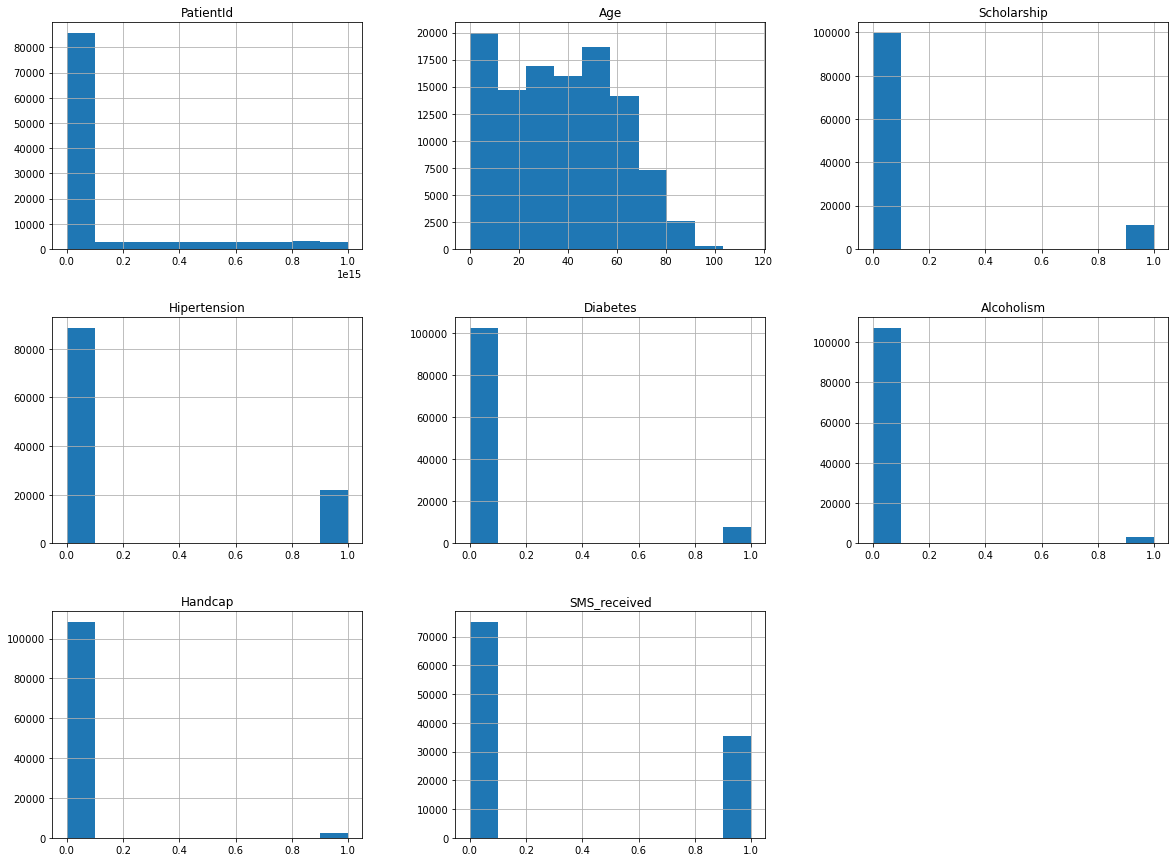

In [196]:
df.hist(figsize = (20,15));

Male Percentage: 35.0%
Female Percentage: 65.0%


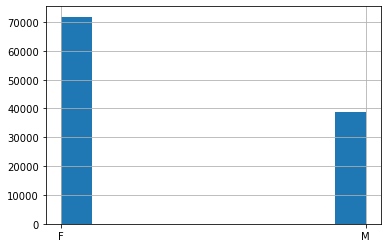

In [197]:
df['Gender'].hist();
df['Gender'].value_counts()
male = round(((df['Gender'].value_counts()[1] / df['Gender'].value_counts().sum())*100), 1)
female = round(((df['Gender'].value_counts()[0] / df['Gender'].value_counts().sum())*100), 1)
print('Male Percentage: {}%\nFemale Percentage: {}%'.format(male, female))

No-show Percentage: 20.2%
Attended Percentage: 79.8%


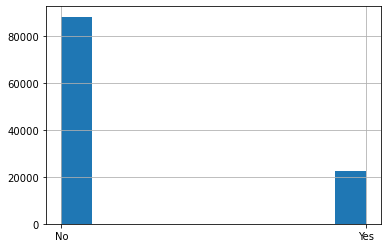

In [198]:
df['No-show'].hist();
df['No-show'].value_counts()
no_show = round(((df['No-show'].value_counts()[1] / df['No-show'].value_counts().sum())*100), 1)
show = round(((df['No-show'].value_counts()[0] / df['No-show'].value_counts().sum())*100), 1)
print('No-show Percentage: {}%\nAttended Percentage: {}%'.format(no_show, show))

In [199]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

<a id='wrangling'></a>
## Data Wrangling

>Here we'll need to:
>1. Rename No-show column for a better workflow.
2. Transforming PatientID to string.
3. Formating date/time columns correctly.
4. Create new column: Appointment WeekDay.


In [200]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [201]:
# Changing No-show column to Boolean.
df.replace({'No-show': {'No': 0, 'Yes': 1}}, inplace = True)

In [202]:
# Renaming No-show column for a better workflow.
df.rename(columns={'No-show': 'Abort'}, inplace=True)

In [203]:
# Transforming PatientID to String
df.PatientId = df.PatientId.apply(lambda x: str(int(x)))

In [204]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Abort
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0


##### Creating a new column [ AppointmentWeekDay ]:

In [205]:
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

In [206]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Abort
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0


In [207]:
df['AppointmentWeekDay'] = df.AppointmentDay.map(lambda x: x.day_name())

In [208]:
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Abort,AppointmentWeekDay
0,29872499824296,F,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday


##### Applying Masks:

In [209]:
attended = df.Abort == False

In [210]:
aborted = df.Abort == True

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question : What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

#### [1]  Appointment Day

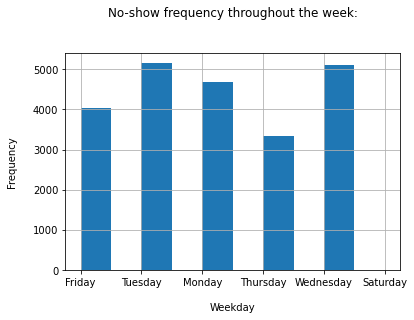

In [211]:
# Displaying No-show frequency throughout the week.
df.AppointmentWeekDay[aborted].hist();
plt.title('No-show frequency throughout the week:\n\n');
plt.xlabel('\nWeekday');
plt.ylabel('Frequency\n');

In [212]:
df.AppointmentWeekDay[aborted].value_counts()['Tuesday']
tue=round(((df.AppointmentWeekDay[aborted].value_counts()['Tuesday'] / df.AppointmentWeekDay[aborted].value_counts().sum())*100), 1)
wed=round(((df.AppointmentWeekDay[aborted].value_counts()['Wednesday'] / df.AppointmentWeekDay[aborted].value_counts().sum())*100), 1)
mon=round(((df.AppointmentWeekDay[aborted].value_counts()['Monday'] / df.AppointmentWeekDay[aborted].value_counts().sum())*100), 1)
fri=round(((df.AppointmentWeekDay[aborted].value_counts()['Friday'] / df.AppointmentWeekDay[aborted].value_counts().sum())*100), 1)
thu=round(((df.AppointmentWeekDay[aborted].value_counts()['Thursday'] / df.AppointmentWeekDay[aborted].value_counts().sum())*100), 1)
sat=round(((df.AppointmentWeekDay[aborted].value_counts()['Saturday'] / df.AppointmentWeekDay[aborted].value_counts().sum())*100), 1)

print('No-show frequency throughout the week:\n\nTue: {}%\nWed: {}%\nMon: {}%\nFri: {}%\nThu: {}%\nSat: {}%\n'
      .format(tue, wed, mon, fri, thu, sat))

No-show frequency throughout the week:

Tue: 23.1%
Wed: 22.8%
Mon: 21.0%
Fri: 18.1%
Thu: 15.0%
Sat: 0.0%



#### [2]  Does sending SMS affect patient for showing up?

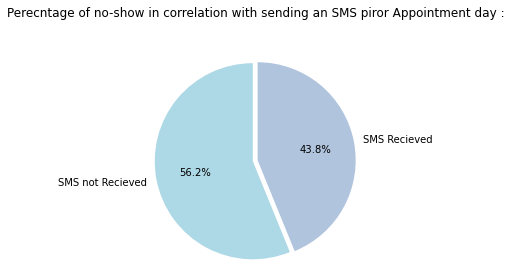

In [213]:
#To compare between two groups, Patients receiving SMS and showed up against Patients receiving SMS and did not show up, a
#pie chart will optimize visualization.

my_data = df.SMS_received[aborted].value_counts()[0], df.SMS_received[aborted].value_counts()[1]
my_labels = 'SMS not Recieved','SMS Recieved'
my_explode = (0, 0.05)
my_colors = ['lightblue','lightsteelblue']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', startangle=90, shadow = False, colors=my_colors, explode=my_explode)
plt.title('Perecntage of no-show in correlation with sending an SMS piror Appointment day :\n\n')
plt.axis('equal')
plt.show()

It shows that sending SMS piror appointment day slightly decreases patients not showing up.

#### [3]  Does gender affect patient for showing up?

In [214]:
df.Gender[aborted].value_counts()

F    14594
M     7725
Name: Gender, dtype: int64

In [215]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

In [216]:
#FemaleAbort to Female Ratio:
fa = (df.Gender[aborted].value_counts()[0]/df.Gender.value_counts()[0])*100
#MaleAbort to Male Ratio:
ma = (df.Gender[aborted].value_counts()[1]/df.Gender.value_counts()[1])*100

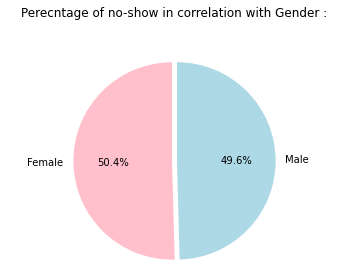

In [217]:
#To compare between two groups, Male and Female Patients whom did not show up, a pie chart will optimize visualization.

my_data = fa, ma
my_labels = 'Female','Male'
my_explode = (0, 0.05)
my_colors = ['pink','lightblue']
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', startangle=90, shadow = False, colors=my_colors, explode=my_explode)
plt.title('Perecntage of no-show in correlation with Gender :\n\n')
plt.axis('equal')
plt.show()

Gender has no effect on patients not showing up.

#### [4]  Does age effect no-show numbers?

In [218]:
# [(df['Age'] < 99)] to skip outliners

Num_of_abort_by_age = df[(df['Age'] < 99)].Age[aborted].value_counts()
Num_patients_by_age = df[(df['Age'] < 99)].Age.value_counts()
percentage = Num_of_abort_by_age / Num_patients_by_age
print(round(percentage*100, 2))


0     18.06
1     18.26
2     15.57
3     18.31
4     21.71
      ...  
94    18.18
95    25.00
96     5.88
97    18.18
98    16.67
Name: Age, Length: 99, dtype: float64


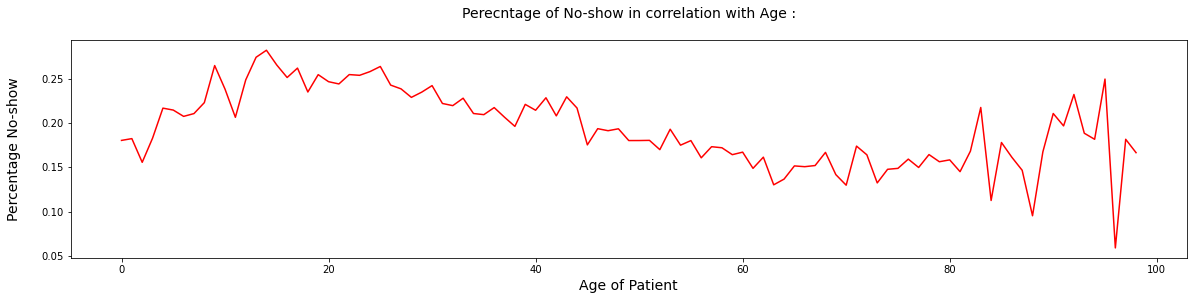

In [219]:
percentage.plot(x="Age", y=["Percentage No-show"], kind="line", figsize = (20,4), color = 'red');
plt.title('Perecntage of No-show in correlation with Age :\n',  fontsize=14)
plt.ylabel('Percentage No-show\n', fontsize=14);
plt.xlabel('Age of Patient', fontsize=14);



No-show is more common between teenagers, and the rate drops with age.

#### [5] No-show in correlation with Neighbourhood

In [220]:
# Excluding Neighbourhoods with insuffiecent data (less than 100 appointment) for more accurate results.
df.Neighbourhood.value_counts()[:-7]

JARDIM CAMBURI      7717
MARIA ORTIZ         5805
RESISTÊNCIA         4431
JARDIM DA PENHA     3877
ITARARÉ             3514
                    ... 
SANTA HELENA         178
HORTO                175
UNIVERSITÁRIO        152
SEGURANÇA DO LAR     145
NAZARETH             135
Name: Neighbourhood, Length: 74, dtype: int64

In [221]:
df.Neighbourhood[aborted].value_counts()[:-7]

JARDIM CAMBURI    1465
MARIA ORTIZ       1219
ITARARÉ            923
RESISTÊNCIA        906
CENTRO             703
                  ... 
DE LOURDES          47
HORTO               42
SANTA HELENA        37
UNIVERSITÁRIO       32
NAZARETH            29
Name: Neighbourhood, Length: 73, dtype: int64

In [222]:

Num_of_abort_by_neighbourhood = df.Neighbourhood[aborted].value_counts()[:-7]
Num_patients_by_neighbourhood = df.Neighbourhood.value_counts()[:-7]
percentage = Num_of_abort_by_neighbourhood / Num_patients_by_neighbourhood
print(round(percentage.sort_values(ascending=False).dropna()*100, 2))

SANTOS DUMONT        28.92
SANTA CECÍLIA        27.46
SANTA CLARA          26.48
ITARARÉ              26.27
JESUS DE NAZARETH    24.40
                     ...  
SANTA MARTHA         15.84
DO CABRAL            15.71
DE LOURDES           15.41
SOLON BORGES         14.71
MÁRIO CYPRESTE       14.56
Name: Neighbourhood, Length: 73, dtype: float64


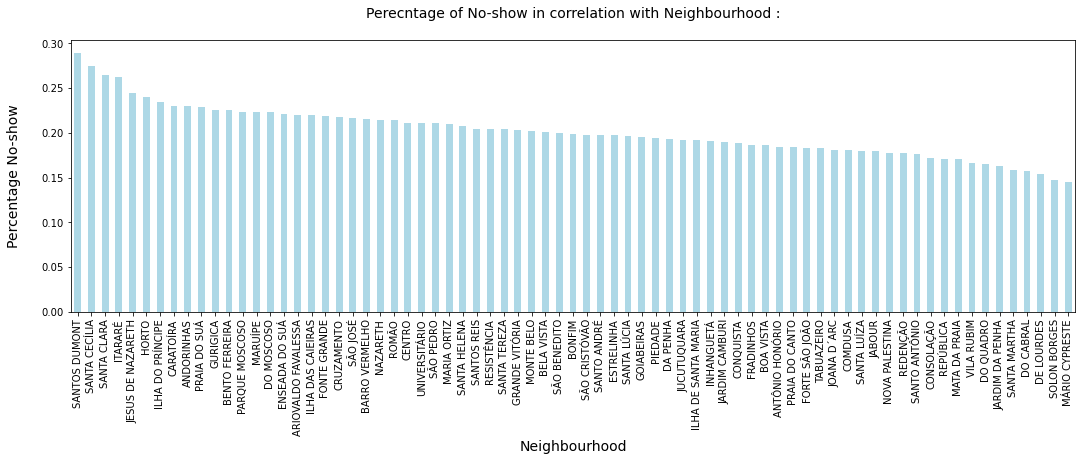

In [223]:
percentage.sort_values(ascending=False).dropna().plot(x="Neighbourhood", y=["Percentage No-show"], kind="bar", figsize = (18,5), color = 'lightblue', label="sum");
plt.title('Perecntage of No-show in correlation with Neighbourhood :\n',  fontsize=14)
plt.ylabel('Percentage No-show\n', fontsize=14);
plt.xlabel('Neighbourhood', fontsize=14);

In [224]:
arg = percentage.sort_values(ascending=False)[:5]
print('Neighbourhood with most No-show:\n\n{}'.format(arg))

Neighbourhood with most No-show:

SANTOS DUMONT        0.289185
SANTA CECÍLIA        0.274554
SANTA CLARA          0.264822
ITARARÉ              0.262664
JESUS DE NAZARETH    0.243954
Name: Neighbourhood, dtype: float64


In [225]:
arg = percentage.sort_values(ascending=True)[:5]
print('Neighbourhood with least No-show:\n\n{}'.format(arg))

Neighbourhood with least No-show:

MÁRIO CYPRESTE    0.145553
SOLON BORGES      0.147122
DE LOURDES        0.154098
DO CABRAL         0.157143
SANTA MARTHA      0.158416
Name: Neighbourhood, dtype: float64


<a id='conclusions'></a>
## Conclusions

> **Gender**: Gender does not seem to affect No-show rate, as they are equally balanced.

> **Appointment Day**: Appointment day No-show rate seems to drop the most on Thursdays, and it peaks on Tuesday.

> **SMS Received**: It shows that sending SMS piror appointment day slightly decreases patients not showing up.

> **Age**: No-show is more common between teenagers, and the rate drops with age.

> **Neighbourhood**: Some neighbourhoods seem to have higher No-show rate than others, with a range of 14%.

>> **Limitations**: The data about the Neighbourhood does not allow for further investigation in order to explain the behavior of patients showing up for their scheduled appointments.